In [5]:
!pip install plotly

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


In [12]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [16]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [18]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [19]:
x_train=[]
y_train=[]
for  i in range (60,1149): #60 : timestep // 1149 : Length of the data
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)    

In [27]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [28]:
import tensorflow as tf

In [29]:
hist= model.fit(x_train, y_train, epochs = 20, batch_size = 32,verbose=2)

Epoch 1/20
35/35 - 14s - loss: 0.0320 - 14s/epoch - 414ms/step
Epoch 2/20
35/35 - 10s - loss: 0.0105 - 10s/epoch - 290ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0090 - 9s/epoch - 251ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0087 - 8s/epoch - 219ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0084 - 8s/epoch - 230ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0072 - 7s/epoch - 199ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0067 - 8s/epoch - 233ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0067 - 7s/epoch - 214ms/step
Epoch 9/20
35/35 - 10s - loss: 0.0067 - 10s/epoch - 278ms/step
Epoch 10/20
35/35 - 10s - loss: 0.0059 - 10s/epoch - 284ms/step
Epoch 11/20
35/35 - 9s - loss: 0.0060 - 9s/epoch - 253ms/step
Epoch 12/20
35/35 - 10s - loss: 0.0059 - 10s/epoch - 274ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0057 - 8s/epoch - 234ms/step
Epoch 14/20
35/35 - 9s - loss: 0.0071 - 9s/epoch - 268ms/step
Epoch 15/20
35/35 - 9s - loss: 0.0065 - 9s/epoch - 265ms/step
Epoch 16/20
35/35 - 9s - loss: 0.0055 - 9s/epoch - 251ms/step
Epoch 1

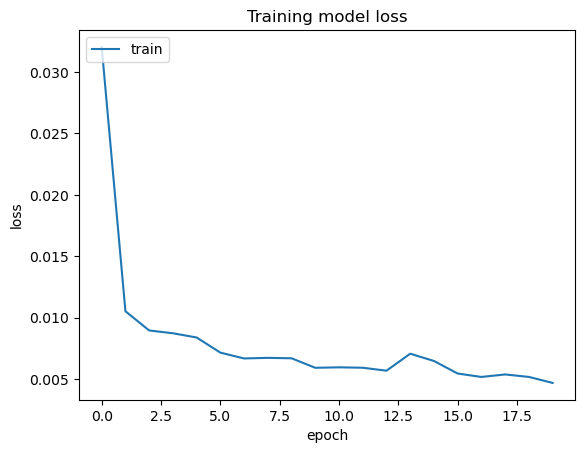

In [30]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [31]:
testData=pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values
#input array for the model
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
x_test=[]
length=len(testData)
timestep = 60
for i in range(timestep,length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(192, 60, 1)

In [32]:
y_pred=model.predict(x_test)
y_pred

6/6 [==============================] - 2s 83ms/step


array([[1.2068661],
       [1.21037  ],
       [1.2214705],
       [1.2384467],
       [1.2534553],
       [1.2564603],
       [1.2462406],
       [1.229225 ],
       [1.216111 ],
       [1.2105565],
       [1.2033657],
       [1.1926122],
       [1.1824315],
       [1.1729518],
       [1.1698041],
       [1.1732346],
       [1.1894424],
       [1.216612 ],
       [1.2492043],
       [1.2825673],
       [1.2996584],
       [1.3001343],
       [1.2826422],
       [1.2541484],
       [1.2258421],
       [1.2069992],
       [1.1996238],
       [1.1974372],
       [1.1911587],
       [1.1815313],
       [1.1703726],
       [1.1574819],
       [1.1386219],
       [1.1148933],
       [1.102958 ],
       [1.1092635],
       [1.1291982],
       [1.1544313],
       [1.1797587],
       [1.1951498],
       [1.208829 ],
       [1.2237872],
       [1.2406123],
       [1.2565848],
       [1.267956 ],
       [1.2704378],
       [1.2618763],
       [1.2521313],
       [1.2473916],
       [1.2505133],


In [33]:
predicted_price=sc.inverse_transform(y_pred)

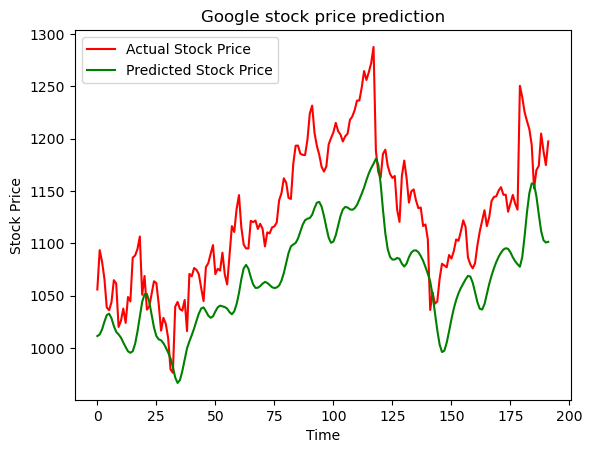

In [34]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()